## Linear Regression

Linear regression is used for finding linear relationship between target and one or more predictors. There are two types of linear regression- Simple and Multiple.



### Regression : real valued output
### Classification : Discrete valued (0/1) , Outputs the classes in which the given example belongs

<img src = 'https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/bn9SyaDIEeav5QpTGIv-Pg_0d06dca3d225f3de8b5a4a7e92254153_Screenshot-2016-11-01-23.48.26.png?expiry=1530662400000&hmac=ebCW6nOYGNKDJtgnOZpWq5DptJfqVOitgcrbRBtjU3M'/>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
path = os.getcwd() + '/student_scores.csv'  
data = pd.read_csv(path)  
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [241]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


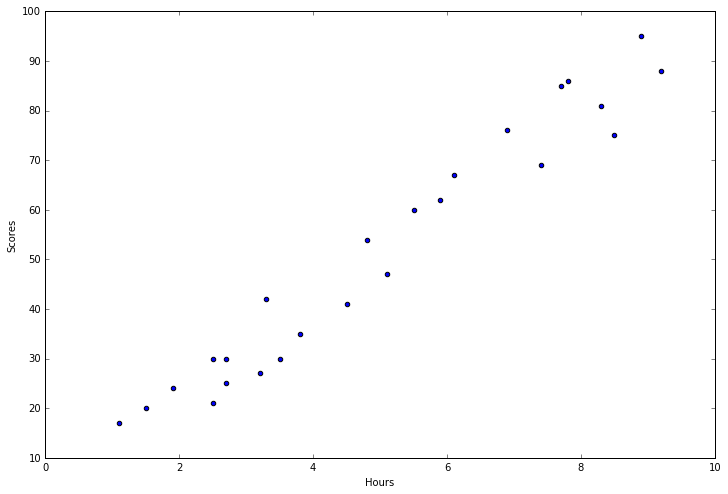

In [242]:
data.plot(kind='scatter', x='Hours', y='Scores', figsize=(12,8))  


In [243]:
theta = np.matrix(np.array([0,0]))  

In [244]:
theta


matrix([[0, 0]])

In [245]:
theta.shape

(1, 2)

In [246]:
data.insert(0, 'Ones', 1)

In [247]:
data.head()

,Ones,Hours,Scores
0,1,2.5,21
1,1,5.1,47
2,1,3.2,27
3,1,8.5,75
4,1,3.5,30


In [248]:
cols = data.shape[1]


In [249]:
cols

3

In [250]:
X = data.iloc[:,0:cols-1]  
X.head()

,Ones,Hours
0,1,2.5
1,1,5.1
2,1,3.2
3,1,8.5
4,1,3.5


In [251]:
y = data.iloc[:,cols-1:cols]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [252]:
X = np.matrix(X.values)  
y = np.matrix(y.values) 

In [253]:
X.shape, theta.shape, y.shape  

((25, 2), (1, 2), (25, 1))

In [254]:
theta = np.matrix(np.array([0,0]))  


In [255]:
def computecost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    suminner=np.sum(inner)
    return suminner/(2*len(X))

In [256]:
computecost(X,y,theta)

1632.02

In [257]:
def gradient(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameter=int(theta.shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(X*theta.T)-y
        for j in range(parameter):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i]=computecost(X,y,theta)
    return theta,cost

In [258]:
alpha=0.04
iters=2000
theta , cost=gradient(X,y,theta,alpha,iters)


In [259]:
theta

matrix([[ 2.48367321,  9.77580342]])

In [260]:
cost.shape

(2000,)

In [261]:
computecost(X,y,theta)

14.441365254622738

In [262]:
x = np.linspace(data.Hours.min(), data.Hours.max(), 100) 


In [263]:
y_pred=theta[0,0]+(theta[0,1]*x)


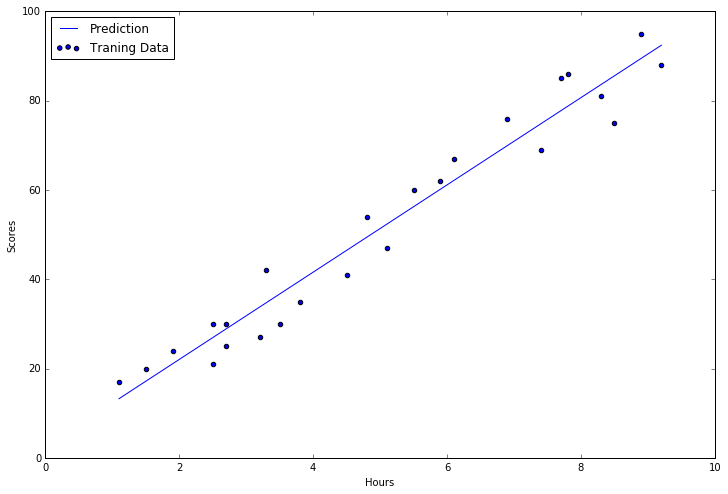

In [264]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, y_pred, label='Prediction')  
ax.scatter(data.Hours, data.Scores ,label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Hours')  
ax.set_ylabel('Scores')  


In [265]:
theta

matrix([[ 2.48367321,  9.77580342]])

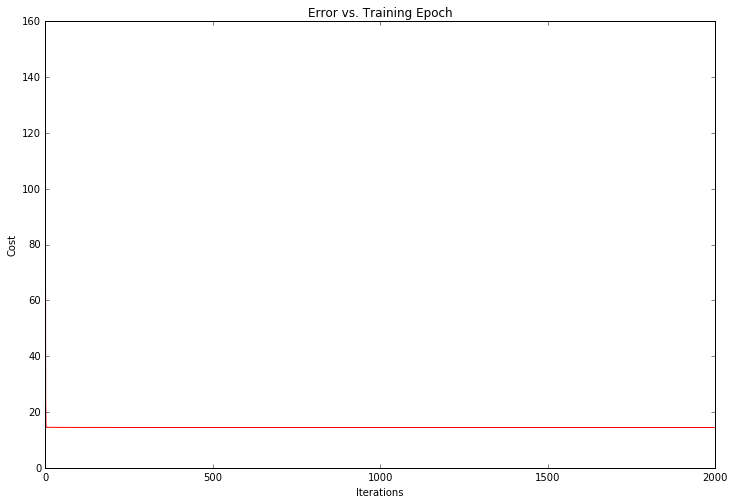

In [266]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  